# Stats and Politics 1: Cleaning and EDA

---

## Part 1: Cleaning


---

First importing packages and setting default figure size for plots

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Setting default figure size
plt.rcParams['figure.figsize'] = (10.0, 6.0) 

The first step in the analysis will be to import the csv's using pandas .read_csv() function.

<sub>*Note: for ease of expression the data from data.csv and votes.csv will be referred to as df_data and df_votes from hereonout*</sub>

In [2]:
# Importing csv's

# votes.csv already has an index column, so I designated the first column as the index
df_votes = pd.read_csv("data/votes.csv", index_col = 0)

df_data = pd.read_csv("data/data.csv")

Next, to ascertain the total number of rows and columns .shape is called and then to check the data types and various aggregate statistical values .info() and .describe() are both used. 
As shown below when .shape is called, the 'data.csv' file contains 3141 rows and 54 columns while the 'votes.csv' file contains 3141 rows and 5 columns.


In [3]:
# Votes has 3141 rows and 5 columns (6 before setting index_col=0)
df_votes.shape

(3141, 5)

In [4]:
# Data has 3141 rows and 54 columns
df_data.shape

(3141, 54)

In [5]:
# Getting cursory info on the completeness of the data
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Democrats_12(Votes)    3110 non-null   float64
 1   Republicans_12(Votes)  3110 non-null   float64
 2   Democrats_16(Votes)    3109 non-null   float64
 3   Republicans_16(Votes)  3109 non-null   float64
 4   Fips                   3141 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 147.2 KB


In [6]:
# Getting % null values per col for votes
(df_votes.isna().sum() / df_votes.shape[0]) * 100

Democrats_12(Votes)      0.986947
Republicans_12(Votes)    0.986947
Democrats_16(Votes)      1.018784
Republicans_16(Votes)    1.018784
Fips                     0.000000
dtype: float64

#### Observations for df_votes:
- The dataframe contains only numeric values
- Data's completeness is adequate for possible replacement of null values using descriptive statistics
- Will need to examine data further to eliminate bias when replacing null values
- Fips is a geographic identifier which is shared with df_data (for our fully cleaned dataframe it may be a good idea to make this into the index column)

In [7]:
df_votes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Democrats_12(Votes),3110.0,21149.725723,74257.582326,5.0,1556.75,3999.0,11381.00,2216903.0
Republicans_12(Votes),3110.0,19532.321222,44795.765395,54.0,2918.75,6450.5,16315.25,885333.0
Democrats_16(Votes),3109.0,20076.967514,72030.867189,4.0,1166.00,3155.0,9610.00,1893770.0
Republicans_16(Votes),3109.0,19634.384046,40459.435551,57.0,3208.00,7169.0,17446.00,620285.0
Fips,3141.0,30406.521490,15156.093390,1001.0,18181.00,29179.0,45083.00,56045.0


In [8]:
# Getting cursory info on completeness of data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 54 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   State                                                       3141 non-null   object 
 1   ST                                                          3140 non-null   object 
 2   Fips                                                        3141 non-null   int64  
 3   County                                                      3141 non-null   object 
 4   Precincts                                                   3109 non-null   float64
 5   Votes                                                       3109 non-null   float64
 6   Less Than High School Diploma                               3141 non-null   float64
 7   At Least High School Diploma                                3141 non-null   float64
 8 

In [9]:
# Getting % null values per col for data
(df_data.isna().sum() / df_data.shape[0]) * 100

State                                                          0.000000
ST                                                             0.031837
Fips                                                           0.000000
County                                                         0.000000
Precincts                                                      1.018784
Votes                                                          1.018784
Less Than High School Diploma                                  0.000000
At Least High School Diploma                                   0.000000
At Least Bachelors's Degree                                    0.000000
Graduate Degree                                                0.000000
School Enrollment                                              0.000000
Median Earnings 2010                                           0.000000
White (Not Latino) Population                                  0.000000
African American Population                                    0

In [10]:
df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fips,3141.0,30406.521490,15156.093390,1001.000000,18181.00000,29179.000000,45083.00000,5.604500e+04
Precincts,3109.0,54.940495,172.926255,1.000000,11.00000,20.000000,38.00000,4.988000e+03
Votes,3109.0,41782.466388,113457.436324,64.000000,4847.00000,10948.000000,28828.00000,2.652072e+06
Less Than High School Diploma,3141.0,16.874514,7.349563,0.700000,11.40000,15.400000,21.60000,5.210000e+01
At Least High School Diploma,3141.0,83.045893,7.533330,29.900000,78.40000,84.600000,88.60000,9.930000e+01
At Least Bachelors's Degree,3141.0,19.013419,8.646941,3.700000,13.10000,16.900000,22.60000,7.100000e+01
Graduate Degree,3141.0,6.449682,3.849162,0.000000,4.00000,5.300000,7.70000,4.060000e+01
School Enrollment,3141.0,74.953932,5.261211,0.000000,72.30000,75.150000,77.95000,1.000000e+02
Median Earnings 2010,3141.0,25463.387576,5078.837873,0.000000,22332.41365,24830.888890,27548.55651,5.667435e+04
White (Not Latino) Population,3141.0,78.778908,19.625220,2.500000,67.70000,86.350000,94.30000,9.920000e+01


In [11]:
df_data.describe(include=['object'])

,State,ST,County
count,3141,3140,3141
unique,51,51,3141
top,Texas,TX,"Baker County, Oregon"
freq,254,254,1


In [12]:
# Checking unique values as there are 51 when there are only 50 states
x = np.sort(df_data['State'].unique())
print(x)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [13]:
# Finding null value of ST for later replacement (index = 3115, State = 'Virginia' so ST should be 'VA')
df_data[df_data['ST'].isnull()]

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
3115,Virginia,NaN,51515,"Bedford city, Virginia",NaN,NaN,15.5,84.5,20.8,7.9,...,0.301,0.128,323.6,343.9,0.155,0.086,297.03,NaN,97.2,NaN


#### Observations for df_data:

- df_data contains several object type columns.
- The ST column is just the abbreviated state names and we already have a state column. For ease it would be better to complete the ST column as there is only 1 missing value which can easily be filled in as the state column is complete.
- Both ST and State columns contain District of Columbia which is interesting as it is not a state (although this is under review this year this data is from 2012/2016 so it's an oddity)
- Fips seems to be some sort of identifier, and upon a cursory google search we can see it is a geographical identifier and it is shared between the two datafranes. We can change the Fips column from an int to a str type object so it's not included in any table calculations or set it as the index of the dataframe
- For ease we will be replacing the state column with the ST column for reference
- Another problem column would be the Homicide.rate column where about 60% of the values are null. Although this may seem impossible to fill there might be correlation between the homicide rate and violent.crime as well as injury.deaths columns which could allow for imputation of the missing values
- The votes and precincts columns also have the exact same number of missing values as the Democrats_16(Votes) and Republicans_16(Votes) columns (for which the same rows are missing both values), so we should check to make sure that the Fips of these rows are the same so that when we trim these rows we don't end up removing important data.
- There are numerous duplicate columns (based on identical summary statistics) of which we will be removing those with less descriptive names:
    - White(Not Latino) Population - White
    - African American Population - Black
    - Native American Population - Amerindian
    - Asian American Population - Asian
    - Other Race or Races - Other
    - Latino Population - Hispanic
- The White_Asian column will also be removed as based on the summary statistics being a simple aggregation of the White and Asian columns which is redundant


In [14]:
# Removing above duplicate and redundant columns
df_data.drop(['White', 
              'Black', 
              'Amerindian', 
              'Asian', 
              'Other',
              'Hispanic', 
              'White_Asian'], 
             axis = 1, inplace = True)

In [15]:
# Changing Fips data type to string for both df_data and df_votes
df_data['Fips'] = df_data['Fips'].astype(str)
df_votes['Fips'] = df_votes['Fips'].astype(str)

In [16]:
# Replacing ST NaN with 'VA'
df_data.loc[3115, 'ST'] = 'VA'

In [17]:
# Dropping 'State' as 'ST' now serves as our state identifier
df_data.drop('State', axis = 1, inplace = True)

In [18]:
# Checking dataframe
df_data.head()

,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,...,0.323,0.126,747.3,79.9,0.197,0.108,449.02,NaN,82.0,NaN
1,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,...,0.328,0.135,247.2,131.3,0.239,0.053,245.83,NaN,96.8,NaN
2,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,...,0.298,0.118,324.1,402.4,0.239,0.096,205.60,NaN,71.6,NaN
3,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,...,0.132,0.036,190.9,133.7,0.230,0.081,123.88,NaN,42.9,3.5
4,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,...,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.11,79.4,NaN


In [19]:
# Checking null values for precinct and votes to see if they can be filled 
df_data.loc[df_data['Votes'].isnull(), ['Fips','ST','County','Precincts']]

,Fips,ST,County,Precincts
139,2110,AK,"Juneau City and Borough, Alaska",NaN
140,2170,AK,"Matanuska-Susitna Borough, Alaska",NaN
397,2068,AK,"Denali Borough, Alaska",NaN
472,2100,AK,"Haines Borough, Alaska",NaN
684,2275,AK,"Wrangell City and Borough, Alaska",NaN
889,2185,AK,"North Slope Borough, Alaska",NaN
1284,2050,AK,"Bethel Census Area, Alaska",NaN
1285,2270,AK,"Wade Hampton Census Area, Alaska",NaN
1286,2188,AK,"Northwest Arctic Borough, Alaska",NaN
1376,2090,AK,"Fairbanks North Star Borough, Alaska",NaN


Since Precincts and Votes data is missing completely at random, it's probably best to simply remove them from the table

Now we will check to make sure that the Fips match between the dataframes for the missing precincts and votes data and missing vote distribution data. We will know if this is true if the new dataframe contains 32 rows.

In [20]:
# Creating two series of Fips to merge in order to check that the correct number of rows is created when merged
df_data_missing = df_data.loc[df_data['Precincts'].isnull(), ['Fips']]
df_votes_missing = df_votes.loc[df_votes['Democrats_16(Votes)'].isnull(), ['Fips']]

In [21]:
# Merging series into a single dataframe to ensure Fips match for missing values
df_check = pd.merge(df_data_missing, df_votes_missing, on = 'Fips')
df_check.shape

(32, 1)

Based off the above, we can now remove the rows with the missing data without causing data to be lost during the final merge. Before merging we will continue cleaning both dataframes so the merging can be done with no data lost

In [22]:
# removing rows with votes/precinct NA as they coincide
df_data = df_data[df_data['Precincts'].notna()]
# checking to make sure we have the correct number of rows
df_data.shape

(3109, 46)

In [23]:
# Checking again to ensure the null values have been removed
(df_data.isna().sum() / df_data.shape[0]) * 100

ST                                                             0.000000
Fips                                                           0.000000
County                                                         0.000000
Precincts                                                      0.000000
Votes                                                          0.000000
Less Than High School Diploma                                  0.000000
At Least High School Diploma                                   0.000000
At Least Bachelors's Degree                                    0.000000
Graduate Degree                                                0.000000
School Enrollment                                              0.000000
Median Earnings 2010                                           0.000000
White (Not Latino) Population                                  0.000000
African American Population                                    0.000000
Native American Population                                     0

In [24]:
# checking homicide rate summary statistics vs injury.deaths and violent crime correlation

df_temp = df_data.loc[df_data['Homicide.rate'].notna(), ['Violent.crime', 'Homicide.rate', 'Injury.deaths']]

df_temp.corr()

,Violent.crime,Homicide.rate,Injury.deaths
Violent.crime,1.000000,0.545686,0.120782
Homicide.rate,0.545686,1.000000,0.447504
Injury.deaths,0.120782,0.447504,1.000000


In [25]:
# Checking covariance
df_temp.cov()

,Violent.crime,Homicide.rate,Injury.deaths
Violent.crime,52942.781793,567.933459,621.480974
Homicide.rate,567.933459,21.543222,47.056984
Injury.deaths,621.480974,47.056984,513.267168


It seems like there may not be enough of a relationship to use the violent crime and injury.deaths data to impute the homicide rate data. This is reasonable as many deaths caused by injuries may not be crime related and many violent crimes will also not necessarily be homicides.

Next we will remove HIV prevalence as it is largely incomplete and we already have the STI rate column which is much more complete and probably accounts for much of the data that would be found in the HIV column. 
For Infant mortality we can also safely remove this data as it has over 50% of its values missing, making any deductions inaccurate for most of the population.

In [26]:
# Dropping HIV prevalence rate, Infant mortality and Homicide rate columns due to incompleteness
df_data.drop(['HIV.prevalence.rate', 
              'Infant.mortality', 
              'Homicide.rate'], 
             axis = 1, inplace = True)

In [27]:
# Checking columns
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3140
Data columns (total 43 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   ST                                                          3109 non-null   object 
 1   Fips                                                        3109 non-null   object 
 2   County                                                      3109 non-null   object 
 3   Precincts                                                   3109 non-null   float64
 4   Votes                                                       3109 non-null   float64
 5   Less Than High School Diploma                               3109 non-null   float64
 6   At Least High School Diploma                                3109 non-null   float64
 7   At Least Bachelors's Degree                                 3109 non-null   float64
 8 

Now, we will check the summary statistics for the adult smoking column to see if we can fill in the null data points with summary statistics without skewing future analysis.

In [28]:
# Checking summary statistics of smoking column
smoking_mean = df_data['Adult.smoking'].mean()
df_data['Adult.smoking'].agg(['mean', 'median', 'std', 'var'])

mean      0.212080
median    0.208000
std       0.062305
var       0.003882
Name: Adult.smoking, dtype: float64

Based on these summary statistics it should be okay to replace missing values with the mean considering the coefficient of variation being substantially less than 1 (0.29) meaning we have relatively low spread in the data. 

Regarding the rest of the incomplete columns with > 5% of the data missing: we will be leaving these columns as they are to preserve the distribution of data as any computations performed can use the subset of complete values. This is to avoid skewing statistics as they are largely related to crime rates and data involving infants which can vary quite a lot in different locations depending on infrastructure and historical context.

In [29]:
# Filling missing values in Adult.smoking column with mean
# Filling missing values in Children.in.single.parent.households and Preschool.Enrollment.Ratio.enrolled.ages.3.and.4 with respective means
df_data['Adult.smoking'].fillna(smoking_mean, inplace = True)
ch_mean = df_data['Children.in.single.parent.households'].mean()
c3_4_mean = df_data['Preschool.Enrollment.Ratio.enrolled.ages.3.and.4'].mean()
df_data['Children.in.single.parent.households'].fillna(ch_mean, inplace = True)
df_data['Preschool.Enrollment.Ratio.enrolled.ages.3.and.4'].fillna(c3_4_mean, inplace = True)

With that done, we are now ready to clear the df_votes data of null values and join the two datasets into a new dataframe to finish the cleaning process

In [30]:
# Checking column names
df_votes.columns

Index(['Democrats_12(Votes)', 'Republicans_12(Votes)', 'Democrats_16(Votes)',
       'Republicans_16(Votes)', 'Fips'],
      dtype='object')

In [31]:
df_votes = df_votes[(df_votes['Democrats_12(Votes)'].notna()) & 
                    (df_votes['Republicans_12(Votes)'].notna()) & 
                    (df_votes['Democrats_16(Votes)'].notna()) & 
                    (df_votes['Republicans_16(Votes)'].notna())]

In [32]:
# Checking row amounts, and we see that they line up perfectly with df_data
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3140
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Democrats_12(Votes)    3109 non-null   float64
 1   Republicans_12(Votes)  3109 non-null   float64
 2   Democrats_16(Votes)    3109 non-null   float64
 3   Republicans_16(Votes)  3109 non-null   float64
 4   Fips                   3109 non-null   object 
dtypes: float64(4), object(1)
memory usage: 145.7+ KB


Now we are ready to assemble our final cleaned dataframe which contains minimal null values and has preserved as much of the integrity of the original data as possible.

For the index column we must check to ensure Fips contains only unique values. If it does, we will use Fips as the index, otherwise we will use the default generated.

In [33]:
# Checking number of unique values in Fips column
# Should be 3109 if it is to be used for our df_clean index
len(df_data['Fips'].unique())

3109

In [34]:
# Merging dataframes and assigning to a fresh dataframe
df_clean = pd.merge(df_data, df_votes, on = 'Fips')
# Checking overview of clean data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3108
Data columns (total 47 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   ST                                                          3109 non-null   object 
 1   Fips                                                        3109 non-null   object 
 2   County                                                      3109 non-null   object 
 3   Precincts                                                   3109 non-null   float64
 4   Votes                                                       3109 non-null   float64
 5   Less Than High School Diploma                               3109 non-null   float64
 6   At Least High School Diploma                                3109 non-null   float64
 7   At Least Bachelors's Degree                                 3109 non-null   float64
 8 

In [35]:
df_clean.set_index('Fips')

,ST,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,...,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes)
Fips,,,,,,,,,,,,,,,,,,,,,
5043,AR,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.50,21988.947300,...,0.126,747.3,0.197,0.108,449.02,82.0,2630.0,3887.0,2364.0,3967.0
5087,AR,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.40,23365.948890,...,0.135,247.2,0.239,0.053,245.83,96.8,2099.0,4263.0,1587.0,4917.0
13159,GA,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.20,25363.060950,...,0.118,324.1,0.239,0.096,205.60,71.6,1845.0,4136.0,1544.0,4353.0
8037,CO,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.10,35484.543175,...,0.036,190.9,0.230,0.081,123.88,42.9,12792.0,9411.0,12652.0,8153.0
13091,GA,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.50,26927.608255,...,0.153,497.9,0.208,0.115,477.48,79.4,2442.0,5214.0,1836.0,5021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39017,OH,"Butler County, Ohio",282.0,168422.0,13.2,86.8,25.9,9.5,79.95,29687.650475,...,0.104,302.2,0.129,0.071,339.05,55.0,62388.0,105176.0,56700.0,104441.0
39091,OH,"Logan County, Ohio",38.0,21007.0,14.1,85.9,14.3,5.2,73.40,27308.285080,...,0.127,238.6,0.136,0.067,133.96,72.6,7062.0,13633.0,4537.0,15586.0
39093,OH,"Lorain County, Ohio",188.0,136654.0,11.5,88.5,20.6,7.6,78.85,28555.704445,...,0.116,387.6,0.131,0.077,266.27,46.3,81464.0,59405.0,64958.0,65346.0


After checking our new dataframe, there are a few columns that should be renamed for clarity and consistency and then the data will be augmented to contain the relative vote count for each party in each election.

In [36]:
# Renaming columns for consistency and clarity
new_names = {
    "Median Earnings 2010": "Median income(2010)",
    "At Least Bachelors's Degree": "At Least Bachelors Degree",
    "Preschool.Enrollment.Ratio.enrolled.ages.3.and.4": "Preschool enrollment ratio for ages 3 to 4",
    "Poverty.Rate.below.federal.poverty.threshold": "Poverty rate below federal threshold",
    "Gini.Coefficient": "Gini coefficient",
    "Child.Poverty.living.in.families.below.the.poverty.line": "Children living below poverty threshold",
    "Management.professional.and.related.occupations": "Management and related occupations",
    "Service.occupations": "Service occupations",
    "Sales.and.office.occupations": "Sales and office occupations",
    "Farming.fishing.and.forestry.occupations": "Farming, fishing, and forestry occupations",
    "Construction.extraction.maintenance.and.repair.occupations": "Construction, extraction, maintenance, and repair occupations",
    "Production.transportation.and.material.moving.occupations": "Production, transportation, and material-moving occupations",
    "SIRE_homogeneity": "SIRE homogeneity",
    "median_age": "Median age",
    "Low.birthweight": "Low birthweight",
    "Teen.births": "Teen births",
    "Children.in.single.parent.households": "Children in single parent households",
    "Adult.smoking": "Adult smokers",
    "Adult.obesity": "Adult obesity",
    "Sexually.transmitted.infections": "Sexually transmitted infections",
    "Violent.crime": "Violent crime",
    "Injury.deaths": "Injury deaths",
    "Democrats_12(Votes)": "Democrat votes (2012)",
    "Republicans_12(Votes)": "Republican votes (2012)",
    "Democrats_16(Votes)": "Democrat votes (2016)",
    "Republicans_16(Votes)": "Republican votes (2016)"
}

df_clean.rename(new_names, axis = 1, inplace = True)

# Checking column names
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3108
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   ST                                                             3109 non-null   object 
 1   Fips                                                           3109 non-null   object 
 2   County                                                         3109 non-null   object 
 3   Precincts                                                      3109 non-null   float64
 4   Votes                                                          3109 non-null   float64
 5   Less Than High School Diploma                                  3109 non-null   float64
 6   At Least High School Diploma                                   3109 non-null   float64
 7   At Least Bachelors Degree                                   

In [37]:
# Augmenting data with relative vote counts for each election
# Rounded to the 3rd decimal place to preserve precision while increasing readability
df_clean["% Democrat votes(2012)"] = round((df_clean["Democrat votes (2012)"] / df_clean["Votes"]) * 100, 3)
df_clean["% Republican votes(2012)"] = round((df_clean["Republican votes (2012)"] / df_clean["Votes"]) * 100, 3)
df_clean["% Democrat votes(2016)"] = round((df_clean["Democrat votes (2016)"] / df_clean["Votes"]) * 100, 3)
df_clean["% Republican votes(2016)"] = round((df_clean["Republican votes (2016)"] / df_clean["Votes"]) * 100, 3)

In [38]:
# Creating columns which state party with popular vote
df_clean['Popular vote(2012)'] = np.where(df_clean['% Democrat votes(2012)'] > 50, 'Democrat', 'Republican')
df_clean['Popular vote(2016)'] = np.where(df_clean['% Democrat votes(2016)'] > 50, 'Democrat', 'Republican')

In [39]:
# Checking overview of columns to ensure all obove operations occured as planned 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3108
Data columns (total 53 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   ST                                                             3109 non-null   object 
 1   Fips                                                           3109 non-null   object 
 2   County                                                         3109 non-null   object 
 3   Precincts                                                      3109 non-null   float64
 4   Votes                                                          3109 non-null   float64
 5   Less Than High School Diploma                                  3109 non-null   float64
 6   At Least High School Diploma                                   3109 non-null   float64
 7   At Least Bachelors Degree                                   

---

## Part 2: EDA

Now take some time to explore, examine and familiarize yourself with the data.
Look at the entire data set. Choose any 5 columns in the dataset. For each:

1. What are each of the columns measuring?
2. Are the values categorical or numeric?

We also encourage you to mentally answer these questions for every column in the dataset.

---

Before distinguishing the meaning behind three columns it is important to note that there are only 3 categorical variables present in this data set. They include the state, county, and fips. All three are geographic indicators varying in specificity with state being the largest division and, county and fips being more granular. As a result all of the columns that have been explored below will be numeric measures.

Precincts:
- It shows the number of voting precincts in a county
- A precinct (or voting district) is the smallest unit into which electoral districts are divided
- Precincts mostly indicate which polling station a people living in an area, delineated by their home address, will use (multiple precincts may use the same polling station)
- Based off this information the precincts column should actually be an integer measure rather than a float

(source: https://www.usa.gov/voting-and-election-definitions)

In [40]:
# Converting precinct column to integers and getting an idea of value range
df_clean['Precincts'] = df_clean['Precincts'].astype(int)
df_clean['Precincts'].agg(['max', 'min', 'mean', 'median'])

max       4988.000000
min          1.000000
mean        54.940495
median      20.000000
Name: Precincts, dtype: float64

SIRE homogeneity:
- SIRE stands for 'self-identified race/ethnicity' (what an individual does whenever filling a census or form that asks their ethnicity/race) 
- Homogeneity is in essence 'sameness' - this is used in statistics to judge whether or not samples from different populations are idential
- Two samples can also be homogenous in one way while being heterogenous in another (e.g. having identical means but differing standard deviations)
- SIRE homogeneity is essentially a measure of the diversity of a population
- As the value increases, the diversity of the population decreases
- Shown as a ratio of the population

(source: https://openpsych.net/paper/12)

Gini coefficient:
- Also referred to as the Gini index
- A measure of distribution which gauges economic inequality in a given population
- It can also be used as a measure of wealth distribution but this is less common
- It is based on the difference between the actual distribution of income and an idealized (perfectly equal) distribution
- Shown as a ratio

(source: https://www.census.gov/topics/income-poverty/income-inequality/about/metrics/gini-index.html)

Injury deaths:
- Deaths caused by fatal injury
- Presented as an average over some period of time (most likely a monthly average over a year of data)

All education data:
- Includes: 
    - Less Than High School Diploma
    - At Least High School Diploma
    - At Least Bachelors's Degree
    - Graduate Degree
    - School Enrollment
- Presented as percentage of total population
- Shows what proportion of the population has attained the indicated level of education

---

## Part 3: Visualizations

Produce 5 unique and meaningful visualizations from this dataset. You can use the columns you've explored in part 2 if you wish, or new ones. (An example of a non-meaningful visualization would be a scatterplot of relative Republican vote share vs relative Democrat vote share, since this doesn't show anything interesting about the data).

---

First we need to contextualize this political data by understanding what the outcomes of these two presidential elections. These elections were (as the US elections always are) highly anticipated and heavily scrutinized by the world at large. As we know, Barrack Obama won the election in 2012 to begin is 2nd term as the President. His initial candidacy in 2008 was (and still is) viewed with surprise as he is the first black (or really just non-white) president the country has had. On the other hand, in 2016, an equally inconceivable event occured as Donald Trump (the current sitting president) won the seat out from under the first female candidate in history, Hillary Clinton. This was a surprising event simply due to his lack of qualification as a politician and given his extreme views in many different aspects of governance. 

Relationships to consider:
- Does the rate of obesity decrease as median income increases?
- How does the distribution of votes change as diversity increases/decreases?
- What is the distribution of Gini coefficient (wealth inequality) accross all counties? Is it a normal distribution?
- What was the voter distribution for each party depending on job type (blue collar/white collar)?


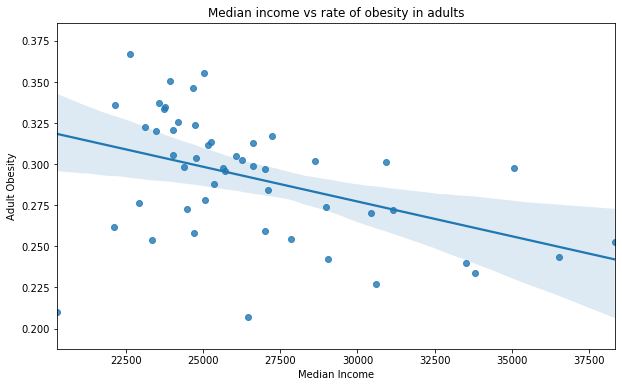

In [41]:
# Obesity rates vs median income
median_income = df_clean.groupby("ST").mean()['Median income(2010)']
adult_obesity = df_clean.groupby("ST").mean()['Adult obesity']

plt.figure()
sns.regplot(median_income, adult_obesity)
plt.xlabel('Median Income')
plt.ylabel('Adult Obesity')
plt.title('Median income vs rate of obesity in adults')
plt.show()

Looking at the plot above we can see that as median income increases obesity rates decrease. Logically this is in line with expectations as inexpensive food options are often less healthy.

Text(0.5, 1.0, 'Popular vote distribution vs. income inequality (2016)')

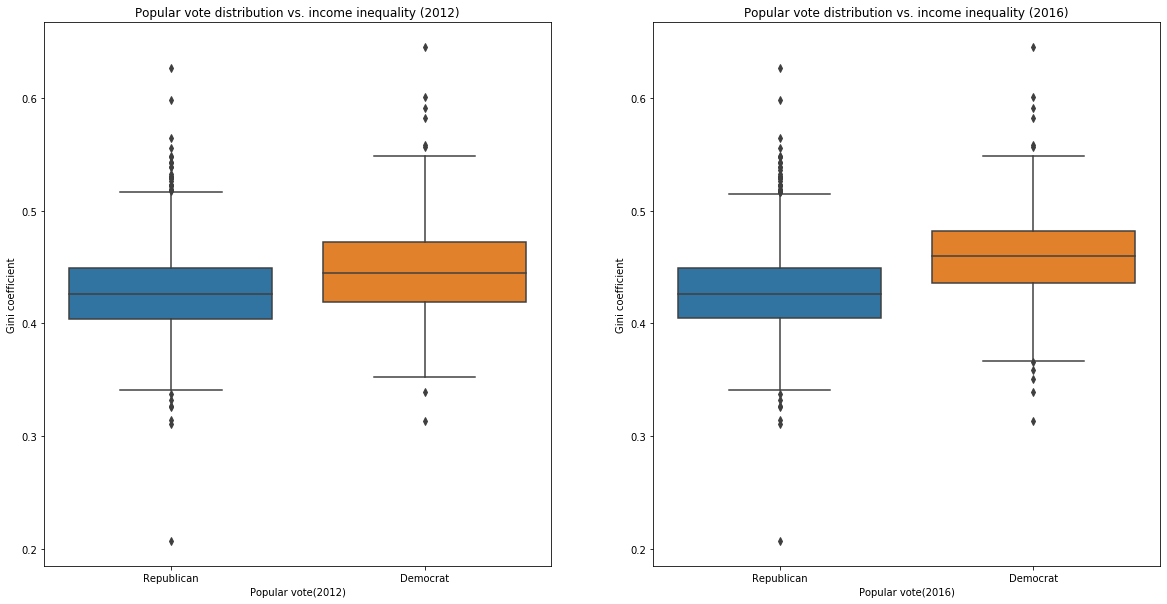

In [42]:
plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
sns.boxplot(x = 'Popular vote(2012)', y = 'Gini coefficient', data = df_clean)
plt.title('Popular vote distribution vs. income inequality (2012)')

plt.subplot(1,2,2)
sns.boxplot(x = 'Popular vote(2016)', y = 'Gini coefficient', data = df_clean)
plt.title('Popular vote distribution vs. income inequality (2016)')

The outcome of this plot is quite surprising based on the platforms upon which each party's candidates have traditionally run. As normally Republican economic policies are more skewed towards the more wealthy citizens it wouldn't be surprising to see that inequality would be higher in areas that were predominantly Republican, however the opposite seems to be true. Of course this could also be because generally more wealthy areas vote Republican which would mean that inequality is low as the population in those locations are of similar above-average wealth. The Republican plot also has a much lower minimum and an incredibly low outlier that is close to an 'ideal' income distribution. 

In [43]:
# creating temporary dataframe to see distribution of popular vote for counties with predominantly blue/white collar professions
blue_collar = df_clean['Farming, fishing, and forestry occupations'] + df_clean['Service occupations'] + df_clean['Construction, extraction, maintenance, and repair occupations'] + \
              df_clean['Production, transportation, and material-moving occupations']
white_collar = df_clean['Management and related occupations'] + df_clean['Sales and office occupations']

df_clean['Collar'] = np.where(blue_collar > white_collar, 'Blue', 'White')

In [44]:
# Assigned blue or white to counties based on percentage blue collar and white collar jobs
# Then used these numbers to create charts below to showcase composition of voter base for republicans and democrats
blue = df_clean[df_clean['Popular vote(2012)'] == 'Democrat'].groupby('Collar').count()
red = df_clean[df_clean['Popular vote(2012)'] == 'Republican'].groupby('Collar').count()
df_dem12 = df_clean[df_clean['Popular vote(2012)'] == 'Democrat']
df_rep12 = df_clean[df_clean['Popular vote(2012)'] == 'Republican']
df_dem16 = df_clean[df_clean['Popular vote(2016)'] == 'Democrat']
df_rep16 = df_clean[df_clean['Popular vote(2016)'] == 'Republican']

xd12 = df_dem12['Collar'].value_counts().index

yd12 = df_dem12['Collar'].value_counts().values

xr12 = df_rep12['Collar'].value_counts().index
yr12 = df_rep12['Collar'].value_counts().values

xd16 = df_dem16['Collar'].value_counts().index
yd16 = df_dem16['Collar'].value_counts().values

xr16 = df_rep16['Collar'].value_counts().index
yr16 = df_rep16['Collar'].value_counts().values

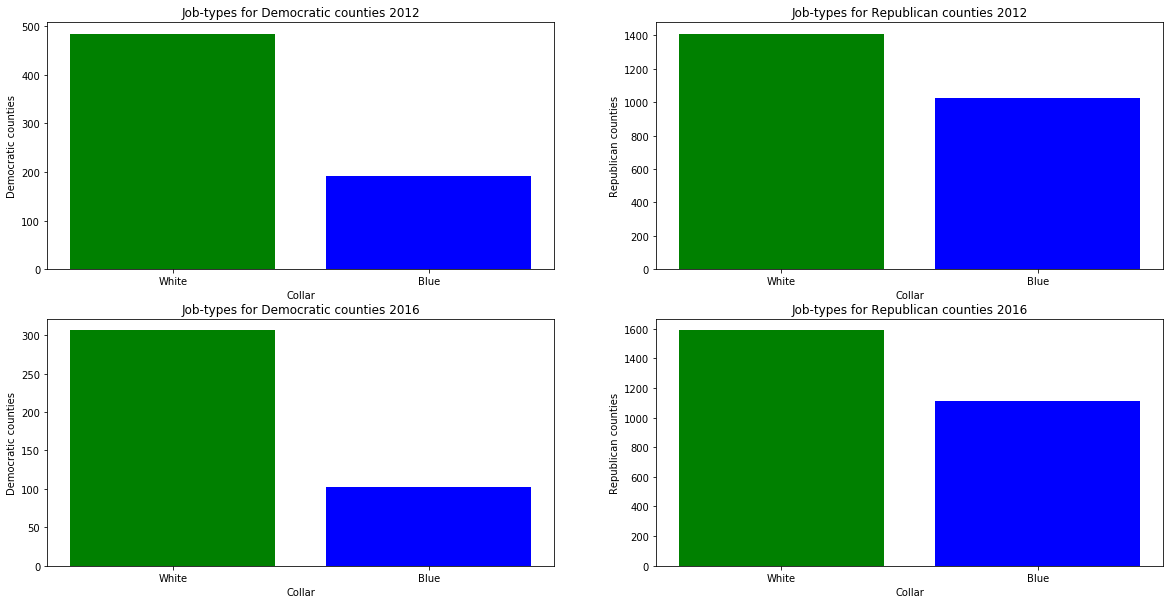

In [45]:
# Plotting values
plt.subplots(2,2, figsize = (20, 10))

plt.subplot(2,2,1)
plt.bar(xd12, yd12, color = ['green', 'blue'])
plt.title('Job-types for Democratic counties 2012')
plt.xlabel('Collar')
plt.ylabel('Democratic counties')

plt.subplot(2,2,2)
plt.bar(xr12, yr12, color = ['green', 'blue'])
plt.xlabel('Collar')
plt.ylabel('Republican counties')
plt.title('Job-types for Republican counties 2012')

plt.subplot(2,2,3)
plt.bar(xd16, yd16, color = ['green', 'blue'])
plt.title('Job-types for Democratic counties 2016')
plt.xlabel('Collar')
plt.ylabel('Democratic counties')

plt.subplot(2,2,4)
plt.bar(xr16, yr16, color = ['green', 'blue'])
plt.xlabel('Collar')
plt.ylabel('Republican counties')
plt.title('Job-types for Republican counties 2016')
plt.show()

As anticipated, counties with primarily blue collar jobs voted primarily republican while white collar counties voted primarily democrat.

In [57]:
# set width of bar
barWidth = 0.2

blued = df_clean[(df_clean['Popular vote(2012)'] == 'Democrat') & 
                 (df_clean['Collar'] == 'Blue')]['ST'].count()
bluer = df_clean[(df_clean['Popular vote(2012)'] == 'Republican') & 
                 (df_clean['Collar'] == 'Blue')]['ST'].count()
                 
whited = df_clean[(df_clean['Popular vote(2012)'] == 'Democrat') & 
                  (df_clean['Collar'] == 'White')]['ST'].count()
whiter = df_clean[(df_clean['Popular vote(2012)'] == 'Republican') & 
                  (df_clean['Collar'] == 'White')]['ST'].count()

print(blued, bluer)
print(whited, whiter)

191 1025
484 1409


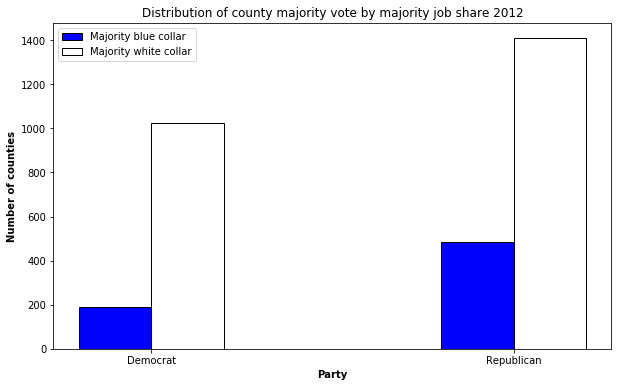

In [61]:
# set height of bar
bars1 = [blued, whited]
bars2 = [bluer, whiter]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.figure()
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='black', label='Majority blue collar')
plt.bar(r2, bars2, color='white', width=barWidth, edgecolor='black', label='Majority white collar')

 
# Add xticks on the middle of the group bars
plt.xlabel('Party', fontweight='bold')
plt.ylabel('Number of counties', fontweight='bold')
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], ['Democrat', 'Republican'])
 
# Create legend & Show graphic
plt.legend()
plt.title('Distribution of county majority vote by majority job share 2012')

plt.show()

In [ ]:
# Plotting Gini coefficient distribution
plt.figure()
plt.hist(df_clean['Gini coefficient'], bins = 500)
plt.xlabel('Gini coefficient')
plt.ylabel('Frequency')
plt.show()

Gini coefficient distribution looks very close to a normal distribution with a very sharp peak, meaning standard deviation is low with most points clustered around the mean.

Let's plot the distribution as a normal distribution to see how well it fits.

In [ ]:
vals = df_clean['Gini coefficient'].sort_values()

plt.figure()
plt.plot(vals, norm.pdf(vals, loc = vals.mean(), scale = vals.std()))
plt.xlabel('Gini coefficient')
plt.ylabel('Density')
plt.show()

Looks very good, could be used to approximate probabilities for a county being of a certain Gini coefficient range. 

Next let's plot SIRE homogeneity to see the distribution of diversity (recall that the SIRE homogeneity is inversely proportional to diversity)

In [ ]:
# plotting SIRE homogeneity distribution as histogram
vals = df_clean['SIRE homogeneity'].sort_values()

plt.figure()
plt.hist(vals, bins = 300)
plt.xlabel('SIRE homogeneity')
plt.ylabel('Frequency')
plt.show()

Diversity seems to be far from a normal distribution. It could also be seen as two different normals grouped together. This shows that there is a subset of the population with very high diversity peaking around 0.48 with a much larger set of more homogenous counties peaking around 0.95.

Lets now see SIRE homogeneity vs population size by state

In [ ]:
# plotting diversity vs total population

sire = df_clean['SIRE homogeneity']
pop = df_clean['Total Population']

plt.figure()
sns.regplot(pop, sire)
plt.ylim([0, 1])
plt.show()

This shows a very interesting phenomenon of diversity sharply increasing as population size increases in a county.

In [ ]:
# Making column names better

df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_').str.replace(',','')

In [ ]:
# Replacing all nas in low_birthweight, teen_births, sexually_transmitted_infections, violent_crime and injury_deaths 
# With median values for states

cols = ['low_birthweight', 'teen_births', 'sexually_transmitted_infections', 'violent_crime', 'injury_deaths']

for col in cols:
    df_clean[col] = df_clean[col].fillna(df_clean.groupby('st').transform('median')[col])